In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.ndimage.filters import gaussian_filter
from datetime import datetime

/var/folders/_3/sryc3_nj66vgwtq9swf_681m0000gn/T/ipykernel_14097/1493323324.py:4: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [2]:
df=pd.read_csv("/Users/linaruiz/Documents/projectEpidemicCurve/data/uncover_countries.csv")
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,BE,Belgium,EURO,0,0,0,0
1,2020-01-04,BE,Belgium,EURO,0,0,0,0
2,2020-01-05,BE,Belgium,EURO,0,0,0,0
3,2020-01-06,BE,Belgium,EURO,0,0,0,0
4,2020-01-07,BE,Belgium,EURO,0,0,0,0


In [3]:
df_italy = df[df['Country_code'] == 'IT']
df_italy['Date_reported'] = pd.to_datetime(df_italy['Date_reported'])

/var/folders/_3/sryc3_nj66vgwtq9swf_681m0000gn/T/ipykernel_14097/1937666387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_italy['Date_reported'] = pd.to_datetime(df_italy['Date_reported'])


In [4]:
df_max_scaled = df_italy.copy()
  
# apply normalization techniques on Column 1
df_max_scaled["norm_new_cases"] = df_max_scaled["New_cases"] /df_max_scaled["New_cases"].abs().max()
df_max_scaled["norm_new_cases"].to_csv("/Users/linaruiz/Documents/projectEpidemicCurve/comparingLanguages/normalizadosPython.csv",index=False)
df_max_scaled["norm_new_cases"]

5994    0.000000
5995    0.000000
5996    0.000000
5997    0.000000
5998    0.000000
          ...   
6988    0.098732
6989    0.092419
6990    0.098017
6991    0.082385
6992    0.043862
Name: norm_new_cases, Length: 999, dtype: float64

With the gaussian function

In [5]:
b=28/2
df_max_scaled["smoothed_new_cases"] = gaussian_filter(df_max_scaled['norm_new_cases'], b)
df_max_scaled["smoothed_new_cases"]

5994    1.966053e-07
5995    2.140056e-07
5996    2.425934e-07
5997    2.979717e-07
5998    3.652036e-07
            ...     
6988    7.797321e-02
6989    7.791185e-02
6990    7.786803e-02
6991    7.783993e-02
6992    7.782736e-02
Name: smoothed_new_cases, Length: 999, dtype: float64

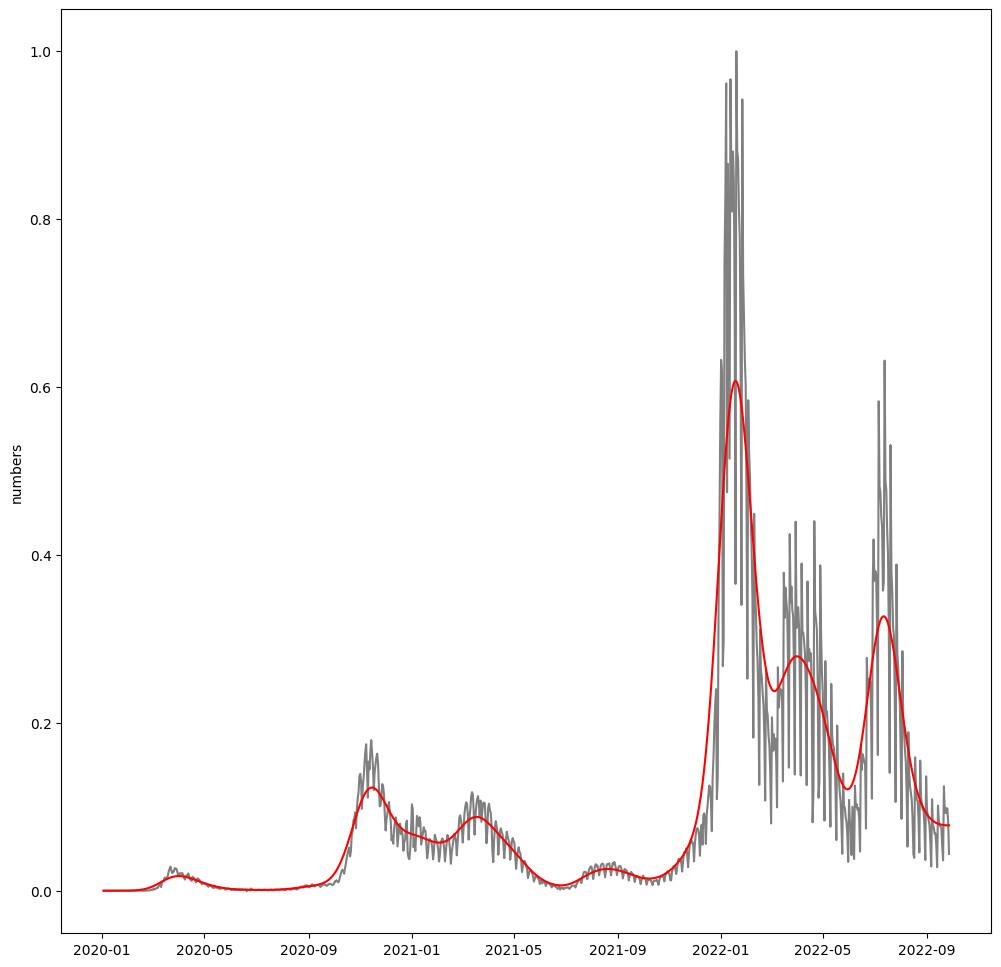

In [6]:
plt.figure(figsize=(12,12))
plt.plot(df_max_scaled["Date_reported"],df_max_scaled["norm_new_cases"],color="gray")

plt.plot(df_max_scaled["Date_reported"],df_max_scaled["smoothed_new_cases"],color="red")
plt.ylabel('numbers')
plt.show()

Manually

Por qué en el siguiente código usa la variable "Date_reported" si en la built-in function solo se usa "df_max_scaled['norm_new_cases']"

In [49]:
for i in [0,1]:
    print(i)

0
1


In [47]:
smoothed_cases = []
b=28/2

for date in sorted(df_max_scaled['Date_reported']):
    df_max_scaled['gaussian'] =np.exp(
        -(((df_max_scaled['Date_reported'] - date).apply(lambda x: x.days)) ** 2) / (2 * (b ** 2))
    )
    df_max_scaled['gaussian'] /= df_max_scaled['gaussian'].sum()
    smoothed_cases.append((df_max_scaled['norm_new_cases'] * df_max_scaled['gaussian']).sum())

df_max_scaled['smoothed_new_cases2'] = smoothed_cases

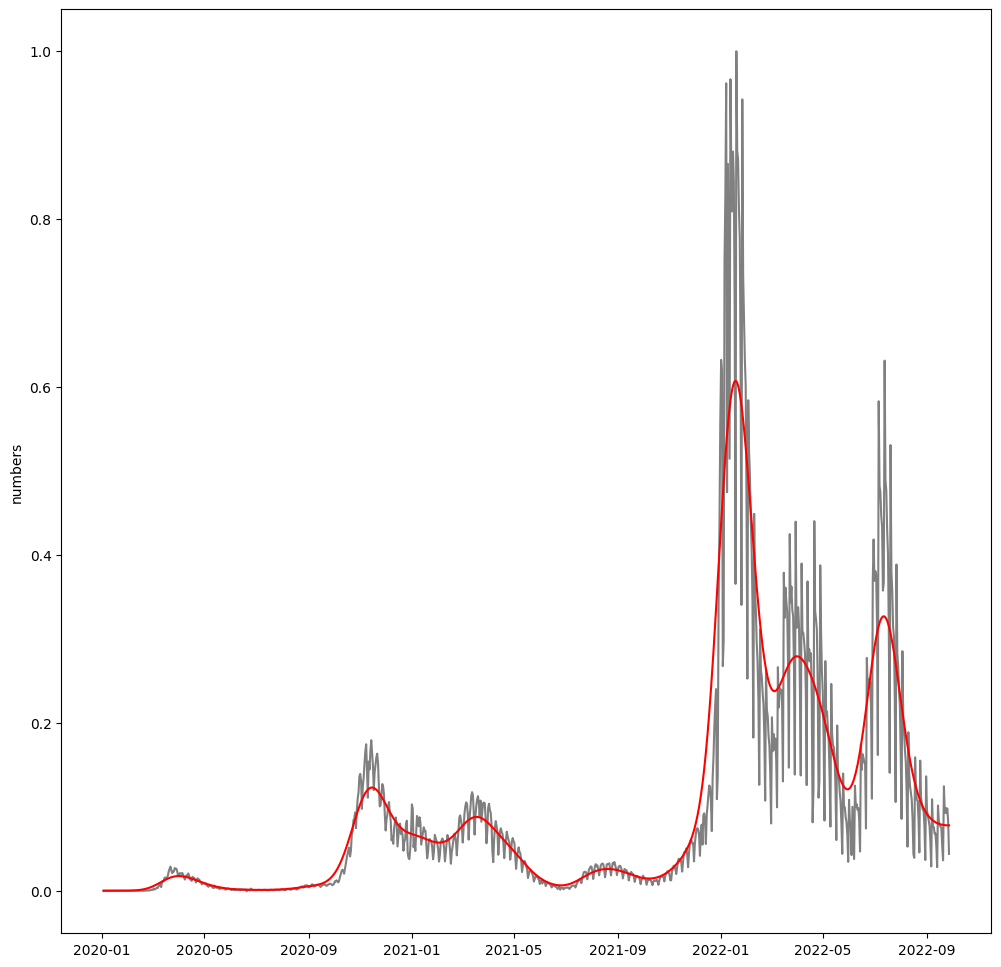

In [48]:
plt.figure(figsize=(12,12))
plt.plot(df_max_scaled["Date_reported"],df_max_scaled["norm_new_cases"],color="gray")

plt.plot(df_max_scaled["Date_reported"],df_max_scaled["smoothed_new_cases2"],color="red")
plt.ylabel('numbers')
plt.show()

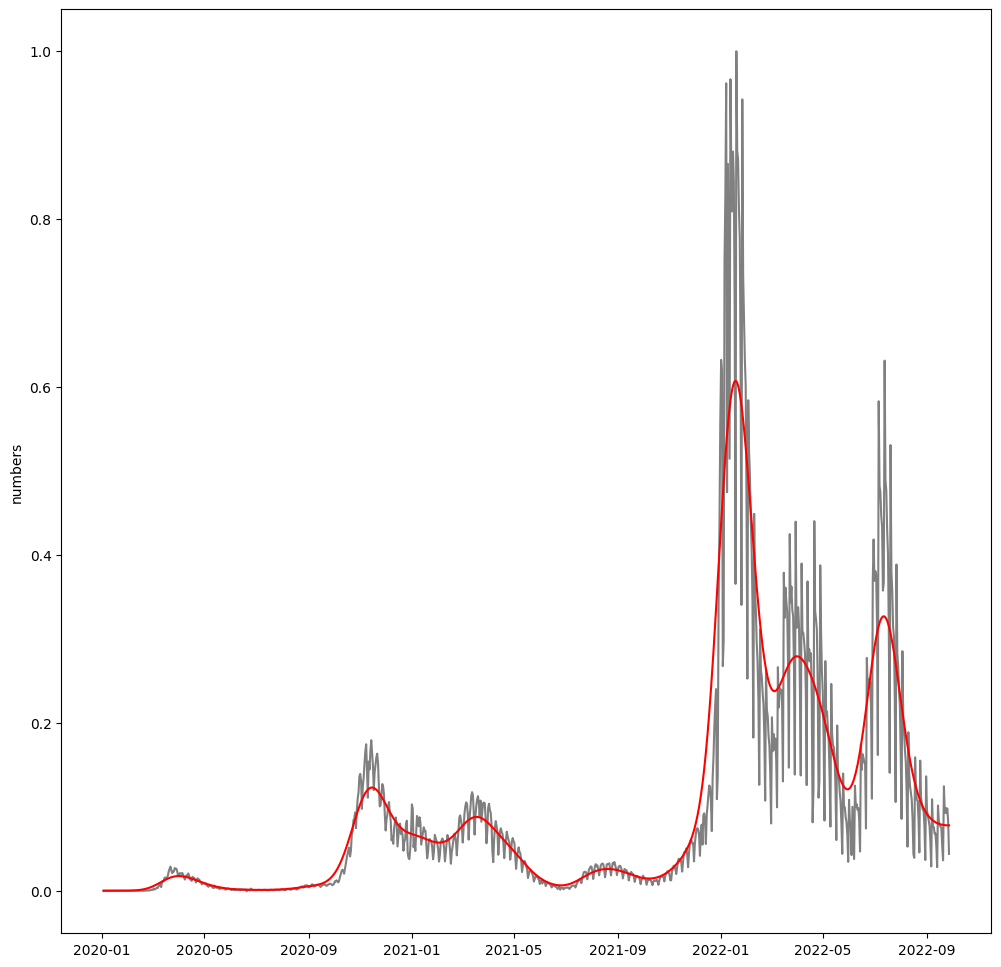

In [8]:
plt.figure(figsize=(12,12))
plt.plot(df_max_scaled["Date_repZported"],df_max_scaled["norm_new_cases"],color="gray")

plt.plot(df_max_scaled["Date_reported"],df_max_scaled["smoothed_new_cases2"],color="red")
plt.ylabel('numbers')
plt.show()

are they the same?

In [9]:
df_max_scaled['smoothed_new_cases']

5994    1.966053e-07
5995    2.140056e-07
5996    2.425934e-07
5997    2.979717e-07
5998    3.652036e-07
            ...     
6988    7.797321e-02
6989    7.791185e-02
6990    7.786803e-02
6991    7.783993e-02
6992    7.782736e-02
Name: smoothed_new_cases, Length: 999, dtype: float64

In [10]:
df_max_scaled['smoothed_new_cases2']

5994    3.312832e-07
5995    3.985310e-07
5996    4.815014e-07
5997    5.840697e-07
5998    7.110547e-07
            ...     
6988    7.801315e-02
6989    7.793944e-02
6990    7.788689e-02
6991    7.785314e-02
6992    7.783597e-02
Name: smoothed_new_cases2, Length: 999, dtype: float64

In [11]:
df_max_scaled['smoothed_new_cases2']==df_max_scaled['smoothed_new_cases']

5994    False
5995    False
5996    False
5997    False
5998    False
        ...  
6988    False
6989    False
6990    False
6991    False
6992    False
Length: 999, dtype: bool

Identificando qué hace el codigo manual:

In [12]:
smoothed_cases = []
b=18/2
for date in sorted(df_max_scaled['Date_reported']):
    df_max_scaled['gaussian'] =np.exp(
        -(((df_max_scaled['Date_reported'] - date).apply(lambda x: x.days)) ** 2) / (2 * (b ** 2))
    )
    df_max_scaled['gaussian'] /= df_max_scaled['gaussian'].sum()
    smoothed_cases.append((df_max_scaled['norm_new_cases'] * df_max_scaled['gaussian']).sum())

df_max_scaled['smoothed_new_cases'] = smoothed_cases

In [13]:
smoothed_cases = []
b=18/2
for date in sorted(df_max_scaled['Date_reported']):
    print(df_max_scaled['Date_reported'] - date)
    

5994     0 days
5995     1 days
5996     2 days
5997     3 days
5998     4 days
         ...   
6988   994 days
6989   995 days
6990   996 days
6991   997 days
6992   998 days
Name: Date_reported, Length: 999, dtype: timedelta64[ns]
5994    -1 days
5995     0 days
5996     1 days
5997     2 days
5998     3 days
         ...   
6988   993 days
6989   994 days
6990   995 days
6991   996 days
6992   997 days
Name: Date_reported, Length: 999, dtype: timedelta64[ns]
5994    -2 days
5995    -1 days
5996     0 days
5997     1 days
5998     2 days
         ...   
6988   992 days
6989   993 days
6990   994 days
6991   995 days
6992   996 days
Name: Date_reported, Length: 999, dtype: timedelta64[ns]
5994    -3 days
5995    -2 days
5996    -1 days
5997     0 days
5998     1 days
         ...   
6988   991 days
6989   992 days
6990   993 days
6991   994 days
6992   995 days
Name: Date_reported, Length: 999, dtype: timedelta64[ns]
5994    -4 days
5995    -3 days
5996    -2 days
5997    -1 days
5998

5994   -804 days
5995   -803 days
5996   -802 days
5997   -801 days
5998   -800 days
          ...   
6988    190 days
6989    191 days
6990    192 days
6991    193 days
6992    194 days
Name: Date_reported, Length: 999, dtype: timedelta64[ns]
5994   -805 days
5995   -804 days
5996   -803 days
5997   -802 days
5998   -801 days
          ...   
6988    189 days
6989    190 days
6990    191 days
6991    192 days
6992    193 days
Name: Date_reported, Length: 999, dtype: timedelta64[ns]
5994   -806 days
5995   -805 days
5996   -804 days
5997   -803 days
5998   -802 days
          ...   
6988    188 days
6989    189 days
6990    190 days
6991    191 days
6992    192 days
Name: Date_reported, Length: 999, dtype: timedelta64[ns]
5994   -807 days
5995   -806 days
5996   -805 days
5997   -804 days
5998   -803 days
          ...   
6988    187 days
6989    188 days
6990    189 days
6991    190 days
6992    191 days
Name: Date_reported, Length: 999, dtype: timedelta64[ns]
5994   -808 days
5995   

In [14]:
smoothed_cases = []
b=18/2
for date in sorted(df_max_scaled['Date_reported']):
    print((df_max_scaled['Date_reported'] - date).apply(lambda x: x.days))

5994      0
5995      1
5996      2
5997      3
5998      4
       ... 
6988    994
6989    995
6990    996
6991    997
6992    998
Name: Date_reported, Length: 999, dtype: int64
5994     -1
5995      0
5996      1
5997      2
5998      3
       ... 
6988    993
6989    994
6990    995
6991    996
6992    997
Name: Date_reported, Length: 999, dtype: int64
5994     -2
5995     -1
5996      0
5997      1
5998      2
       ... 
6988    992
6989    993
6990    994
6991    995
6992    996
Name: Date_reported, Length: 999, dtype: int64
5994     -3
5995     -2
5996     -1
5997      0
5998      1
       ... 
6988    991
6989    992
6990    993
6991    994
6992    995
Name: Date_reported, Length: 999, dtype: int64
5994     -4
5995     -3
5996     -2
5997     -1
5998      0
       ... 
6988    990
6989    991
6990    992
6991    993
6992    994
Name: Date_reported, Length: 999, dtype: int64
5994     -5
5995     -4
5996     -3
5997     -2
5998     -1
       ... 
6988    989
6989    990
6990    9

5994   -319
5995   -318
5996   -317
5997   -316
5998   -315
       ... 
6988    675
6989    676
6990    677
6991    678
6992    679
Name: Date_reported, Length: 999, dtype: int64
5994   -320
5995   -319
5996   -318
5997   -317
5998   -316
       ... 
6988    674
6989    675
6990    676
6991    677
6992    678
Name: Date_reported, Length: 999, dtype: int64
5994   -321
5995   -320
5996   -319
5997   -318
5998   -317
       ... 
6988    673
6989    674
6990    675
6991    676
6992    677
Name: Date_reported, Length: 999, dtype: int64
5994   -322
5995   -321
5996   -320
5997   -319
5998   -318
       ... 
6988    672
6989    673
6990    674
6991    675
6992    676
Name: Date_reported, Length: 999, dtype: int64
5994   -323
5995   -322
5996   -321
5997   -320
5998   -319
       ... 
6988    671
6989    672
6990    673
6991    674
6992    675
Name: Date_reported, Length: 999, dtype: int64
5994   -324
5995   -323
5996   -322
5997   -321
5998   -320
       ... 
6988    670
6989    671
6990    6

5994   -629
5995   -628
5996   -627
5997   -626
5998   -625
       ... 
6988    365
6989    366
6990    367
6991    368
6992    369
Name: Date_reported, Length: 999, dtype: int64
5994   -630
5995   -629
5996   -628
5997   -627
5998   -626
       ... 
6988    364
6989    365
6990    366
6991    367
6992    368
Name: Date_reported, Length: 999, dtype: int64
5994   -631
5995   -630
5996   -629
5997   -628
5998   -627
       ... 
6988    363
6989    364
6990    365
6991    366
6992    367
Name: Date_reported, Length: 999, dtype: int64
5994   -632
5995   -631
5996   -630
5997   -629
5998   -628
       ... 
6988    362
6989    363
6990    364
6991    365
6992    366
Name: Date_reported, Length: 999, dtype: int64
5994   -633
5995   -632
5996   -631
5997   -630
5998   -629
       ... 
6988    361
6989    362
6990    363
6991    364
6992    365
Name: Date_reported, Length: 999, dtype: int64
5994   -634
5995   -633
5996   -632
5997   -631
5998   -630
       ... 
6988    360
6989    361
6990    3

5994   -705
5995   -704
5996   -703
5997   -702
5998   -701
       ... 
6988    289
6989    290
6990    291
6991    292
6992    293
Name: Date_reported, Length: 999, dtype: int64
5994   -706
5995   -705
5996   -704
5997   -703
5998   -702
       ... 
6988    288
6989    289
6990    290
6991    291
6992    292
Name: Date_reported, Length: 999, dtype: int64
5994   -707
5995   -706
5996   -705
5997   -704
5998   -703
       ... 
6988    287
6989    288
6990    289
6991    290
6992    291
Name: Date_reported, Length: 999, dtype: int64
5994   -708
5995   -707
5996   -706
5997   -705
5998   -704
       ... 
6988    286
6989    287
6990    288
6991    289
6992    290
Name: Date_reported, Length: 999, dtype: int64
5994   -709
5995   -708
5996   -707
5997   -706
5998   -705
       ... 
6988    285
6989    286
6990    287
6991    288
6992    289
Name: Date_reported, Length: 999, dtype: int64
5994   -710
5995   -709
5996   -708
5997   -707
5998   -706
       ... 
6988    284
6989    285
6990    2

5994   -950
5995   -949
5996   -948
5997   -947
5998   -946
       ... 
6988     44
6989     45
6990     46
6991     47
6992     48
Name: Date_reported, Length: 999, dtype: int64
5994   -951
5995   -950
5996   -949
5997   -948
5998   -947
       ... 
6988     43
6989     44
6990     45
6991     46
6992     47
Name: Date_reported, Length: 999, dtype: int64
5994   -952
5995   -951
5996   -950
5997   -949
5998   -948
       ... 
6988     42
6989     43
6990     44
6991     45
6992     46
Name: Date_reported, Length: 999, dtype: int64
5994   -953
5995   -952
5996   -951
5997   -950
5998   -949
       ... 
6988     41
6989     42
6990     43
6991     44
6992     45
Name: Date_reported, Length: 999, dtype: int64
5994   -954
5995   -953
5996   -952
5997   -951
5998   -950
       ... 
6988     40
6989     41
6990     42
6991     43
6992     44
Name: Date_reported, Length: 999, dtype: int64
5994   -955
5995   -954
5996   -953
5997   -952
5998   -951
       ... 
6988     39
6989     40
6990     

In [15]:
smoothed_cases = []
b=18/2
for date in sorted(df_max_scaled['Date_reported']):
    print(((df_max_scaled['Date_reported'] - date).apply(lambda x: x.days))**2)

5994         0
5995         1
5996         4
5997         9
5998        16
         ...  
6988    988036
6989    990025
6990    992016
6991    994009
6992    996004
Name: Date_reported, Length: 999, dtype: int64
5994         1
5995         0
5996         1
5997         4
5998         9
         ...  
6988    986049
6989    988036
6990    990025
6991    992016
6992    994009
Name: Date_reported, Length: 999, dtype: int64
5994         4
5995         1
5996         0
5997         1
5998         4
         ...  
6988    984064
6989    986049
6990    988036
6991    990025
6992    992016
Name: Date_reported, Length: 999, dtype: int64
5994         9
5995         4
5996         1
5997         0
5998         1
         ...  
6988    982081
6989    984064
6990    986049
6991    988036
6992    990025
Name: Date_reported, Length: 999, dtype: int64
5994        16
5995         9
5996         4
5997         1
5998         0
         ...  
6988    980100
6989    982081
6990    984064
6991    986049
69

5994     44944
5995     44521
5996     44100
5997     43681
5998     43264
         ...  
6988    611524
6989    613089
6990    614656
6991    616225
6992    617796
Name: Date_reported, Length: 999, dtype: int64
5994     45369
5995     44944
5996     44521
5997     44100
5998     43681
         ...  
6988    609961
6989    611524
6990    613089
6991    614656
6992    616225
Name: Date_reported, Length: 999, dtype: int64
5994     45796
5995     45369
5996     44944
5997     44521
5998     44100
         ...  
6988    608400
6989    609961
6990    611524
6991    613089
6992    614656
Name: Date_reported, Length: 999, dtype: int64
5994     46225
5995     45796
5996     45369
5997     44944
5998     44521
         ...  
6988    606841
6989    608400
6990    609961
6991    611524
6992    613089
Name: Date_reported, Length: 999, dtype: int64
5994     46656
5995     46225
5996     45796
5997     45369
5998     44944
         ...  
6988    605284
6989    606841
6990    608400
6991    609961
69

5994    435600
5995    434281
5996    432964
5997    431649
5998    430336
         ...  
6988    111556
6989    112225
6990    112896
6991    113569
6992    114244
Name: Date_reported, Length: 999, dtype: int64
5994    436921
5995    435600
5996    434281
5997    432964
5998    431649
         ...  
6988    110889
6989    111556
6990    112225
6991    112896
6992    113569
Name: Date_reported, Length: 999, dtype: int64
5994    438244
5995    436921
5996    435600
5997    434281
5998    432964
         ...  
6988    110224
6989    110889
6990    111556
6991    112225
6992    112896
Name: Date_reported, Length: 999, dtype: int64
5994    439569
5995    438244
5996    436921
5997    435600
5998    434281
         ...  
6988    109561
6989    110224
6990    110889
6991    111556
6992    112225
Name: Date_reported, Length: 999, dtype: int64
5994    440896
5995    439569
5996    438244
5997    436921
5998    435600
         ...  
6988    108900
6989    109561
6990    110224
6991    110889
69

5994    641601
5995    640000
5996    638401
5997    636804
5998    635209
         ...  
6988     37249
6989     37636
6990     38025
6991     38416
6992     38809
Name: Date_reported, Length: 999, dtype: int64
5994    643204
5995    641601
5996    640000
5997    638401
5998    636804
         ...  
6988     36864
6989     37249
6990     37636
6991     38025
6992     38416
Name: Date_reported, Length: 999, dtype: int64
5994    644809
5995    643204
5996    641601
5997    640000
5998    638401
         ...  
6988     36481
6989     36864
6990     37249
6991     37636
6992     38025
Name: Date_reported, Length: 999, dtype: int64
5994    646416
5995    644809
5996    643204
5997    641601
5998    640000
         ...  
6988     36100
6989     36481
6990     36864
6991     37249
6992     37636
Name: Date_reported, Length: 999, dtype: int64
5994    648025
5995    646416
5996    644809
5997    643204
5998    641601
         ...  
6988     35721
6989     36100
6990     36481
6991     36864
69

5994    779689
5995    777924
5996    776161
5997    774400
5998    772641
         ...  
6988     12321
6989     12544
6990     12769
6991     12996
6992     13225
Name: Date_reported, Length: 999, dtype: int64
5994    781456
5995    779689
5996    777924
5997    776161
5998    774400
         ...  
6988     12100
6989     12321
6990     12544
6991     12769
6992     12996
Name: Date_reported, Length: 999, dtype: int64
5994    783225
5995    781456
5996    779689
5997    777924
5998    776161
         ...  
6988     11881
6989     12100
6990     12321
6991     12544
6992     12769
Name: Date_reported, Length: 999, dtype: int64
5994    784996
5995    783225
5996    781456
5997    779689
5998    777924
         ...  
6988     11664
6989     11881
6990     12100
6991     12321
6992     12544
Name: Date_reported, Length: 999, dtype: int64
5994    786769
5995    784996
5996    783225
5997    781456
5998    779689
         ...  
6988     11449
6989     11664
6990     11881
6991     12100
69

In [16]:
smoothed_cases = []
b=18/2
for date in sorted(df_max_scaled['Date_reported']):
    print(np.exp(
        -(((df_max_scaled['Date_reported'] - date).apply(lambda x: x.days)) ** 2) / (2 * (b ** 2))
    ))

5994    1.000000
5995    0.993846
5996    0.975611
5997    0.945959
5998    0.905955
          ...   
6988    0.000000
6989    0.000000
6990    0.000000
6991    0.000000
6992    0.000000
Name: Date_reported, Length: 999, dtype: float64
5994    0.993846
5995    1.000000
5996    0.993846
5997    0.975611
5998    0.945959
          ...   
6988    0.000000
6989    0.000000
6990    0.000000
6991    0.000000
6992    0.000000
Name: Date_reported, Length: 999, dtype: float64
5994    0.975611
5995    0.993846
5996    1.000000
5997    0.993846
5998    0.975611
          ...   
6988    0.000000
6989    0.000000
6990    0.000000
6991    0.000000
6992    0.000000
Name: Date_reported, Length: 999, dtype: float64
5994    0.945959
5995    0.975611
5996    0.993846
5997    1.000000
5998    0.993846
          ...   
6988    0.000000
6989    0.000000
6990    0.000000
6991    0.000000
6992    0.000000
Name: Date_reported, Length: 999, dtype: float64
5994    0.905955
5995    0.945959
5996    0.975611
5997 

5994    6.390106e-25
5995    2.052036e-24
5996    6.508789e-24
5997    2.039171e-23
5998    6.310237e-23
            ...     
6988    0.000000e+00
6989    0.000000e+00
6990    0.000000e+00
6991    0.000000e+00
6992    0.000000e+00
Name: Date_reported, Length: 999, dtype: float64
5994    1.965484e-25
5995    6.390106e-25
5996    2.052036e-24
5997    6.508789e-24
5998    2.039171e-23
            ...     
6988    0.000000e+00
6989    0.000000e+00
6990    0.000000e+00
6991    0.000000e+00
6992    0.000000e+00
Name: Date_reported, Length: 999, dtype: float64
5994    5.971305e-26
5995    1.965484e-25
5996    6.390106e-25
5997    2.052036e-24
5998    6.508789e-24
            ...     
6988    0.000000e+00
6989    0.000000e+00
6990    0.000000e+00
6991    0.000000e+00
6992    0.000000e+00
Name: Date_reported, Length: 999, dtype: float64
5994    1.791874e-26
5995    5.971305e-26
5996    1.965484e-25
5997    6.390106e-25
5998    2.052036e-24
            ...     
6988    0.000000e+00
6989    0.000

5994    3.342020e-78
5995    2.709009e-77
5996    2.168954e-76
5997    1.715254e-75
5998    1.339815e-74
            ...     
6988    0.000000e+00
6989    0.000000e+00
6990    0.000000e+00
6991    0.000000e+00
6992    0.000000e+00
Name: Date_reported, Length: 999, dtype: float64
5994    4.072359e-79
5995    3.342020e-78
5996    2.709009e-77
5997    2.168954e-76
5998    1.715254e-75
            ...     
6988    0.000000e+00
6989    0.000000e+00
6990    0.000000e+00
6991    0.000000e+00
6992    0.000000e+00
Name: Date_reported, Length: 999, dtype: float64
5994    4.901413e-80
5995    4.072359e-79
5996    3.342020e-78
5997    2.709009e-77
5998    2.168954e-76
            ...     
6988    0.000000e+00
6989    0.000000e+00
6990    0.000000e+00
6991    0.000000e+00
6992    0.000000e+00
Name: Date_reported, Length: 999, dtype: float64
5994    5.826864e-81
5995    4.901413e-80
5996    4.072359e-79
5997    3.342020e-78
5998    2.709009e-77
            ...     
6988    0.000000e+00
6989    0.000

5994    1.469717e-180
5995    3.574562e-179
5996    8.587177e-178
5997    2.037587e-176
5998    4.775518e-175
            ...      
6988     0.000000e+00
6989     0.000000e+00
6990     0.000000e+00
6991     0.000000e+00
6992     0.000000e+00
Name: Date_reported, Length: 999, dtype: float64
5994    5.968743e-182
5995    1.469717e-180
5996    3.574562e-179
5997    8.587177e-178
5998    2.037587e-176
            ...      
6988     0.000000e+00
6989     0.000000e+00
6990     0.000000e+00
6991     0.000000e+00
6992     0.000000e+00
Name: Date_reported, Length: 999, dtype: float64
5994    2.394255e-183
5995    5.968743e-182
5996    1.469717e-180
5997    3.574562e-179
5998    8.587177e-178
            ...      
6988     0.000000e+00
6989     0.000000e+00
6990     0.000000e+00
6991     0.000000e+00
6992     0.000000e+00
Name: Date_reported, Length: 999, dtype: float64
5994    9.486286e-185
5995    2.394255e-183
5996    5.968743e-182
5997    1.469717e-180
5998    3.574562e-179
            ...  

5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
       ... 
6988    0.0
6989    0.0
6990    0.0
6991    0.0
6992    0.0
Name: Date_reported, Length: 999, dtype: float64
5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
       ... 
6988    0.0
6989    0.0
6990    0.0
6991    0.0
6992    0.0
Name: Date_reported, Length: 999, dtype: float64
5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
       ... 
6988    0.0
6989    0.0
6990    0.0
6991    0.0
6992    0.0
Name: Date_reported, Length: 999, dtype: float64
5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
       ... 
6988    0.0
6989    0.0
6990    0.0
6991    0.0
6992    0.0
Name: Date_reported, Length: 999, dtype: float64
5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
       ... 
6988    0.0
6989    0.0
6990    0.0
6991    0.0
6992    0.0
Name: Date_reported, Length: 999, dtype: float64
5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
       ... 
6988    0.0
6989    0.0

5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
       ... 
6988    0.0
6989    0.0
6990    0.0
6991    0.0
6992    0.0
Name: Date_reported, Length: 999, dtype: float64
5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
       ... 
6988    0.0
6989    0.0
6990    0.0
6991    0.0
6992    0.0
Name: Date_reported, Length: 999, dtype: float64
5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
       ... 
6988    0.0
6989    0.0
6990    0.0
6991    0.0
6992    0.0
Name: Date_reported, Length: 999, dtype: float64
5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
       ... 
6988    0.0
6989    0.0
6990    0.0
6991    0.0
6992    0.0
Name: Date_reported, Length: 999, dtype: float64
5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
       ... 
6988    0.0
6989    0.0
6990    0.0
6991    0.0
6992    0.0
Name: Date_reported, Length: 999, dtype: float64
5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
       ... 
6988    0.0
6989    0.0

5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
       ... 
6988    0.0
6989    0.0
6990    0.0
6991    0.0
6992    0.0
Name: Date_reported, Length: 999, dtype: float64
5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
       ... 
6988    0.0
6989    0.0
6990    0.0
6991    0.0
6992    0.0
Name: Date_reported, Length: 999, dtype: float64
5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
       ... 
6988    0.0
6989    0.0
6990    0.0
6991    0.0
6992    0.0
Name: Date_reported, Length: 999, dtype: float64
5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
       ... 
6988    0.0
6989    0.0
6990    0.0
6991    0.0
6992    0.0
Name: Date_reported, Length: 999, dtype: float64
5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
       ... 
6988    0.0
6989    0.0
6990    0.0
6991    0.0
6992    0.0
Name: Date_reported, Length: 999, dtype: float64
5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
       ... 
6988    0.0
6989    0.0

5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
       ... 
6988    0.0
6989    0.0
6990    0.0
6991    0.0
6992    0.0
Name: Date_reported, Length: 999, dtype: float64
5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
       ... 
6988    0.0
6989    0.0
6990    0.0
6991    0.0
6992    0.0
Name: Date_reported, Length: 999, dtype: float64
5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
       ... 
6988    0.0
6989    0.0
6990    0.0
6991    0.0
6992    0.0
Name: Date_reported, Length: 999, dtype: float64
5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
       ... 
6988    0.0
6989    0.0
6990    0.0
6991    0.0
6992    0.0
Name: Date_reported, Length: 999, dtype: float64
5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
       ... 
6988    0.0
6989    0.0
6990    0.0
6991    0.0
6992    0.0
Name: Date_reported, Length: 999, dtype: float64
5994    0.0
5995    0.0
5996    0.0
5997    0.0
5998    0.0
       ... 
6988    0.0
6989    0.0

5994     0.000000e+00
5995     0.000000e+00
5996     0.000000e+00
5997     0.000000e+00
5998     0.000000e+00
            ...      
6988    1.586393e-200
6989    5.419969e-202
6990    1.829031e-203
6991    6.096543e-205
6992    2.007172e-206
Name: Date_reported, Length: 999, dtype: float64
5994     0.000000e+00
5995     0.000000e+00
5996     0.000000e+00
5997     0.000000e+00
5998     0.000000e+00
            ...      
6988    4.586309e-199
6989    1.586393e-200
6990    5.419969e-202
6991    1.829031e-203
6992    6.096543e-205
Name: Date_reported, Length: 999, dtype: float64
5994     0.000000e+00
5995     0.000000e+00
5996     0.000000e+00
5997     0.000000e+00
5998     0.000000e+00
            ...      
6988    1.309646e-197
6989    4.586309e-199
6990    1.586393e-200
6991    5.419969e-202
6992    1.829031e-203
Name: Date_reported, Length: 999, dtype: float64
5994     0.000000e+00
5995     0.000000e+00
5996     0.000000e+00
5997     0.000000e+00
5998     0.000000e+00
            ...  

5994     0.000000e+00
5995     0.000000e+00
5996     0.000000e+00
5997     0.000000e+00
5998     0.000000e+00
            ...      
6988    2.658924e-129
6989    1.769381e-130
6990    1.162988e-131
6991    7.550359e-133
6992    4.841704e-134
Name: Date_reported, Length: 999, dtype: float64
5994     0.000000e+00
5995     0.000000e+00
5996     0.000000e+00
5997     0.000000e+00
5998     0.000000e+00
            ...      
6988    3.946650e-128
6989    2.658924e-129
6990    1.769381e-130
6991    1.162988e-131
6992    7.550359e-133
Name: Date_reported, Length: 999, dtype: float64
5994     0.000000e+00
5995     0.000000e+00
5996     0.000000e+00
5997     0.000000e+00
5998     0.000000e+00
            ...      
6988    5.786151e-127
6989    3.946650e-128
6990    2.658924e-129
6991    1.769381e-130
6992    1.162988e-131
Name: Date_reported, Length: 999, dtype: float64
5994     0.000000e+00
5995     0.000000e+00
5996     0.000000e+00
5997     0.000000e+00
5998     0.000000e+00
            ...  

5994    0.000000e+00
5995    0.000000e+00
5996    0.000000e+00
5997    0.000000e+00
5998    0.000000e+00
            ...     
6988    5.867864e-35
6989    1.445212e-35
6990    3.515778e-36
6991    8.447918e-37
6992    2.005009e-37
Name: Date_reported, Length: 999, dtype: float64
5994    0.000000e+00
5995    0.000000e+00
5996    0.000000e+00
5997    0.000000e+00
5998    0.000000e+00
            ...     
6988    2.353243e-34
6989    5.867864e-35
6990    1.445212e-35
6991    3.515778e-36
6992    8.447918e-37
Name: Date_reported, Length: 999, dtype: float64
5994    0.000000e+00
5995    0.000000e+00
5996    0.000000e+00
5997    0.000000e+00
5998    0.000000e+00
            ...     
6988    9.321631e-34
6989    2.353243e-34
6990    5.867864e-35
6991    1.445212e-35
6992    3.515778e-36
Name: Date_reported, Length: 999, dtype: float64
5994    0.000000e+00
5995    0.000000e+00
5996    0.000000e+00
5997    0.000000e+00
5998    0.000000e+00
            ...     
6988    3.647165e-33
6989    9.321

5994    0.000000e+00
5995    0.000000e+00
5996    0.000000e+00
5997    0.000000e+00
5998    0.000000e+00
            ...     
6988    2.233631e-10
6989    1.058354e-10
6990    4.953235e-11
6991    2.289735e-11
6992    1.045490e-11
Name: Date_reported, Length: 999, dtype: float64
5994    0.000000e+00
5995    0.000000e+00
5996    0.000000e+00
5997    0.000000e+00
5998    0.000000e+00
            ...     
6988    4.656186e-10
6989    2.233631e-10
6990    1.058354e-10
6991    4.953235e-11
6992    2.289735e-11
Name: Date_reported, Length: 999, dtype: float64
5994    0.000000e+00
5995    0.000000e+00
5996    0.000000e+00
5997    0.000000e+00
5998    0.000000e+00
            ...     
6988    9.587104e-10
6989    4.656186e-10
6990    2.233631e-10
6991    1.058354e-10
6992    4.953235e-11
Name: Date_reported, Length: 999, dtype: float64
5994    0.000000e+00
5995    0.000000e+00
5996    0.000000e+00
5997    0.000000e+00
5998    0.000000e+00
            ...     
6988    1.949768e-09
6989    9.587

In [17]:
np.exp(0)

1.0

In [18]:
df_max_scaled['gaussian'] /= df_max_scaled['gaussian'].sum()

END

In [19]:
from datetime import datetime
df_max_scaled['gkv_1'] = np.exp(
    -(((df_max_scaled['Date_reported'] - datetime(2020, 1, 5)).apply(lambda x: x.days)) ** 2) / (2 * (2 ** 2))
)

np.exp(-((1)** 2) / (2 * (2 ** 2)))
df_max_scaled['gkv']=df_max_scaled['gkv_1'] / df_max_scaled['gkv_'].sum()
plt.plot(df_max_scaled["Date_reported"],df_max_scaled["gaussian"])

KeyError: 'gkv_'

In [20]:
import numpy as np
smoothed_cases = []
for date in sorted(df_belgium['Date_reported']):
    df_belgium['gaussian'] =np.exp(
        -(((df_belgium['Date_reported'] - date).apply(lambda x: x.days)) ** 2) / (2 * (2 ** 2))
    )
    df_belgium['gaussian'] /= df_belgium['gaussian'].sum()
    smoothed_cases.append(round(df_belgium['New_cases'] * df_belgium['gaussian']).sum())

df_belgium['smoothed_new_cases4'] = smoothed_cases


NameError: name 'df_belgium' is not defined